In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import io
from scipy import stats
import statsmodels.formula.api as smf

In [2]:
from google.colab import files
up = files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [3]:
data = pd.read_csv(io.StringIO(up['50_Startups.csv'].decode('utf-8')))
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


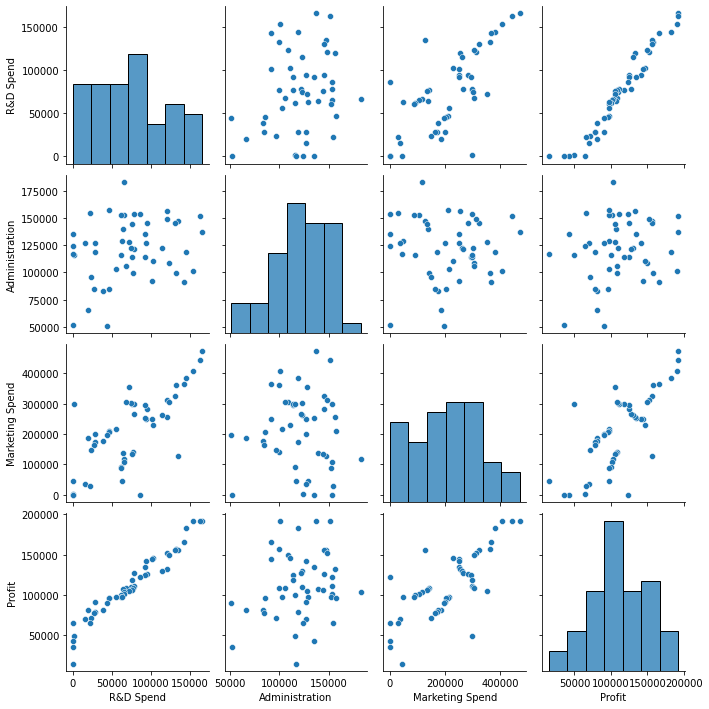

In [7]:
sns.pairplot(data)

In [8]:
data.rename(columns = {'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_Spend'},inplace=True)
data.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
model = smf.ols("Profit~RD_Spend+Administration+Marketing_Spend",data=data).fit()

In [10]:
model.params

Intercept          50122.192990
RD_Spend               0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [11]:
print(model.tvalues, '\n', model.pvalues)

Intercept           7.626218
RD_Spend           17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 
 Intercept          1.057379e-09
RD_Spend           2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


In [12]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [13]:
ml_a=smf.ols('Profit~Administration',data = data).fit()  
print(ml_a.tvalues, '\n', ml_a.pvalues)  

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [14]:
ml_m=smf.ols('Profit~Marketing_Spend',data = data).fit()  
print(ml_m.tvalues, '\n', ml_m.pvalues) 

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


In [15]:
ml_am=smf.ols('Profit~Administration+Marketing_Spend',data = data).fit()  
print(ml_am.tvalues, '\n', ml_am.pvalues) 

Intercept          1.142741
Administration     2.467779
Marketing_Spend    8.281039
dtype: float64 
 Intercept          2.589341e-01
Administration     1.729198e-02
Marketing_Spend    9.727245e-11
dtype: float64


In [16]:
rsq_rd = smf.ols('RD_Spend~Administration+Marketing_Spend',data=data).fit().rsquared  
vif_rd = 1/(1-rsq_rd) 

rsq_ad = smf.ols('Administration~RD_Spend+Marketing_Spend',data=data).fit().rsquared  
vif_ad = 1/(1-rsq_ad) 

rsq_ms = smf.ols('Marketing_Spend~RD_Spend+Administration',data=data).fit().rsquared  
vif_ms = 1/(1-rsq_ms) 

# Storing vif values in a data frame
d1 = {'Variables':['RD_Spend','Administration','Marketing_Spend'],'VIF':[vif_rd,vif_ad,vif_ms]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RD_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


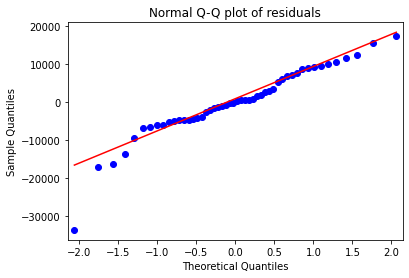

In [17]:
#applying q-q plot to check if errors are normally distriuted.
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


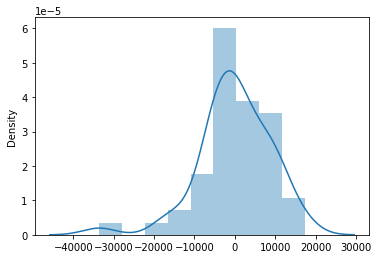

In [18]:
sns.distplot(model.resid)

In [19]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

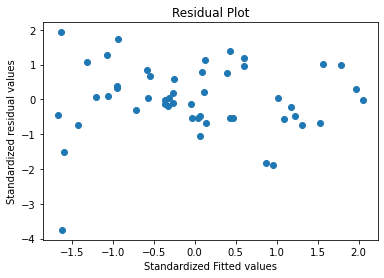

In [20]:
#Homoscedsticity
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

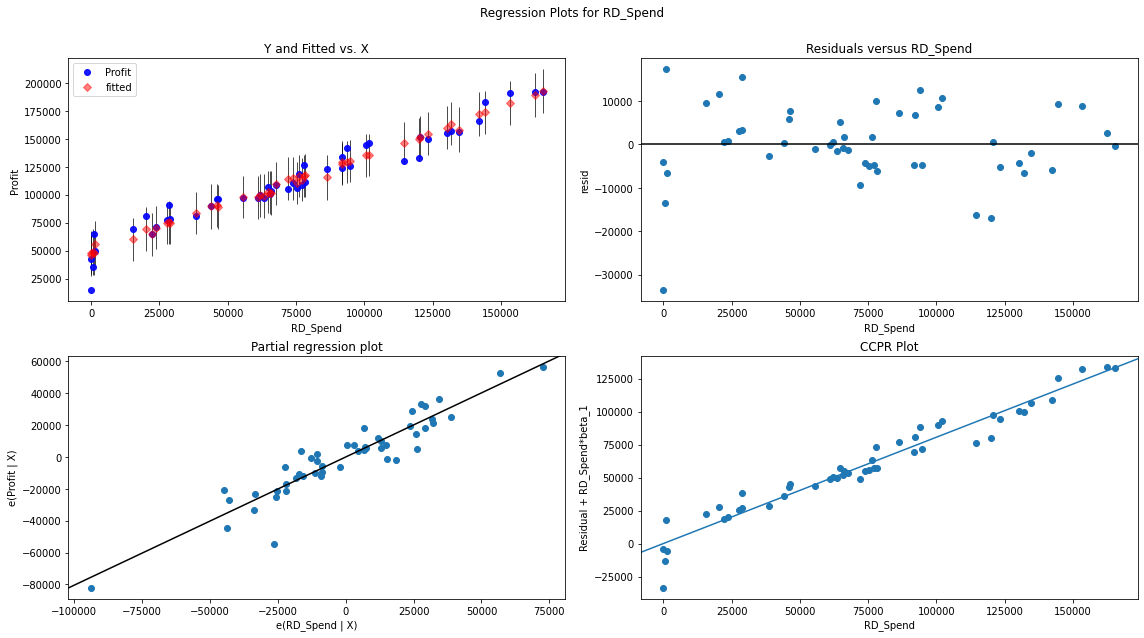

In [21]:
#Residual vs regressor
#This should not follow pattern.
fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model, "RD_Spend", fig=fig)
plt.show()


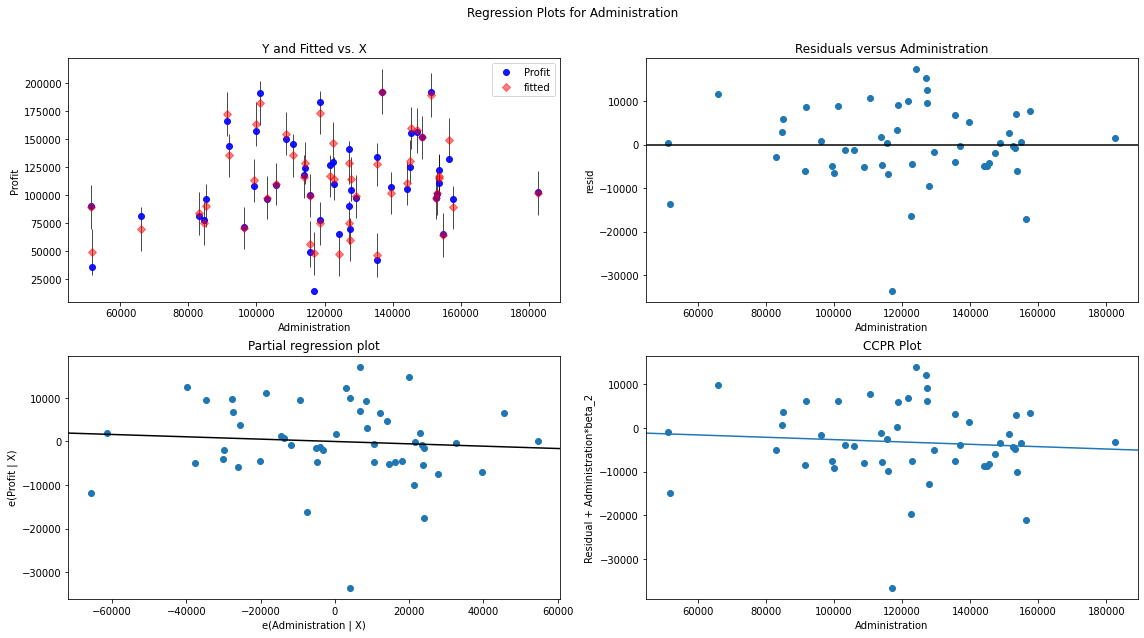

In [22]:
#Residual vs regressor
#This should not follow pattern.
fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()


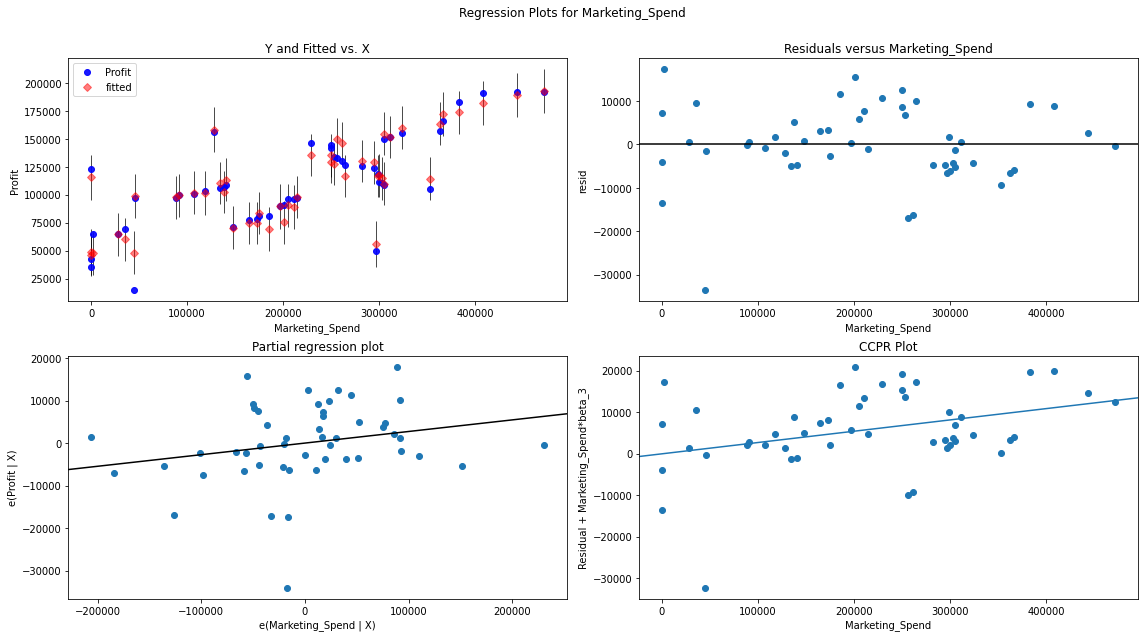

In [23]:
#Residual vs regressor
#This should not follow pattern.
fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()


In [24]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
#cooks distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


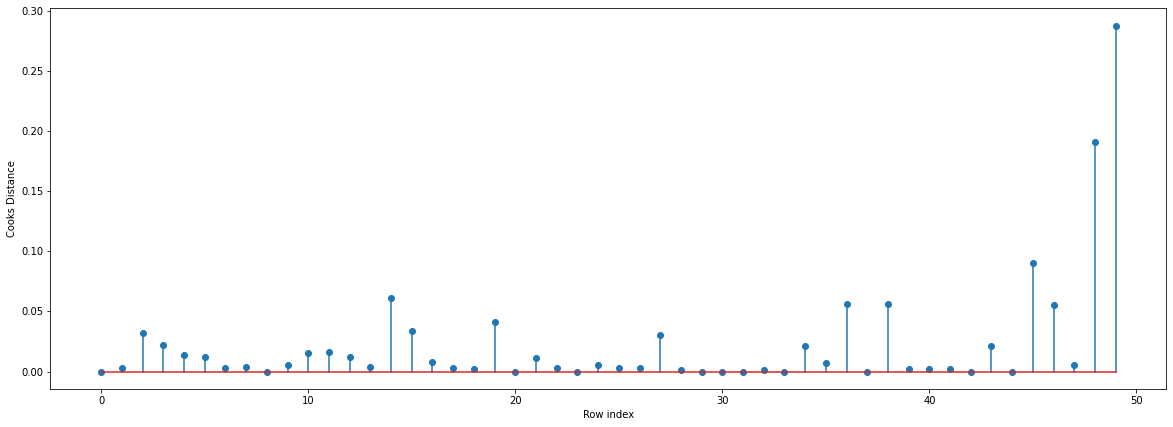

In [25]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [26]:
(np.argmax(c))

49

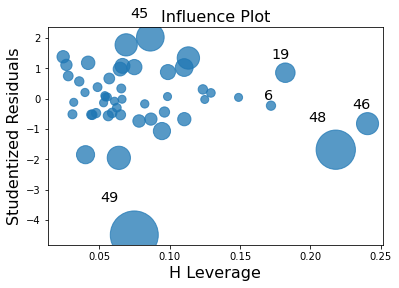

In [27]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [28]:
#49 is outlier. hence, dropping.

In [29]:
data1=data.drop(data.index[[49]],axis=0).reset_index()
data1

,index,RD_Spend,Administration,Marketing_Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [30]:
data1=data1.drop(['index'],axis=1)
data1

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [31]:
new_model= smf.ols("Profit~RD_Spend+Administration+Marketing_Spend",data=data1).fit()

In [32]:
(new_model.rsquared,new_model.aic)

(0.9613162435129848, 1020.5652974526366)

In [33]:
#Repeating process from cook's distance to remove outliers and get better model.
model_influence = new_model.get_influence()
(c_V, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


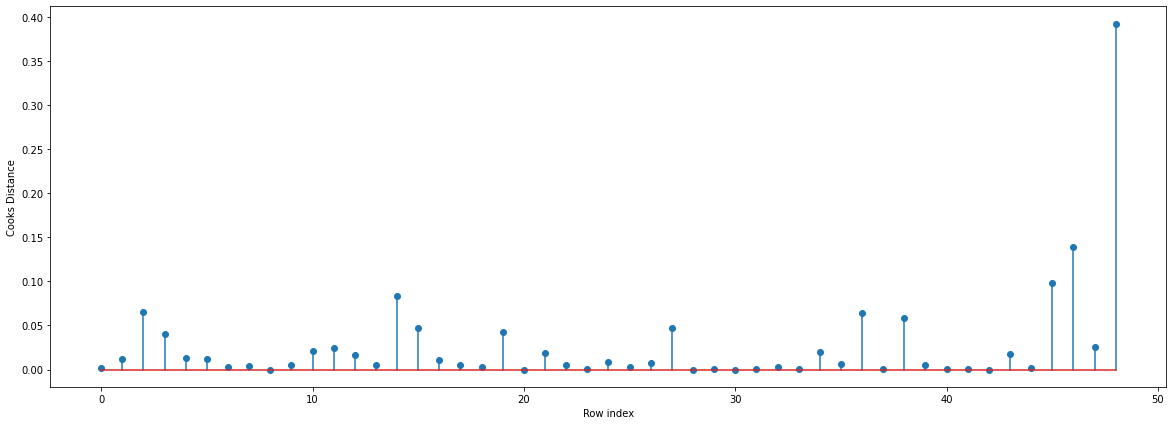

In [34]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [35]:
(np.argmax(c_V))

48

In [36]:
data2=data1.drop(data1.index[[48]],axis=0).reset_index()
data2=data2.drop(['index'],axis=1)
data2

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [37]:
new_model2 = smf.ols("Profit~RD_Spend+Administration+Marketing_Spend",data=data2).fit()

In [38]:
(new_model2.rsquared,new_model2.aic)

(0.9626766170294073, 994.6690439260116)

In [39]:
y = data2.Profit
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
Name: Profit, dtype: float64

In [40]:
predict_y = new_model2.predict(data2)
predict_y

0     188939.277484
1     185378.579127
2     180724.354190
3     172036.176973
4     171688.341312
5     163022.000480
6     158209.614122
7     158220.907984
8     150109.699290
9     154738.693091
10    136423.996608
11    136983.077541
12    129358.856016
13    127411.303969
14    148209.733354
15    146169.352040
16    117452.473394
17    129413.398834
18    129283.715044
19    117601.471936
20    117133.061217
21    116309.227099
22    114863.211696
23    110864.900559
24    116009.988463
25    103641.278061
26    111704.162860
27    113893.992032
28    101671.536476
29    103009.366384
30    102256.729372
31     99182.294414
32    101752.157668
33    100008.334349
34     89323.295403
35     93510.860091
36     77077.516667
37     93971.553437
38     74021.946441
39     87240.005930
40     77209.481295
41     78532.184335
42     74169.833041
43     63870.996869
44     67279.610923
45     52055.366556
46     57819.901390
47     50519.334182
dtype: float64

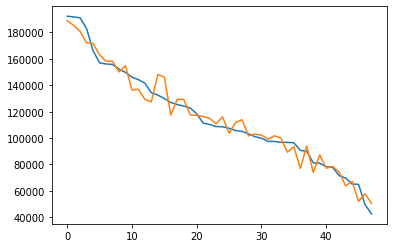

In [41]:
plt.plot(y)
plt.plot(predict_y)
plt.show()

In [42]:
new_data=pd.DataFrame({"RD_Spend":146000,"Administration":185000,"Marketing_Spend":305000,"State":'New York',"Profit":196000},index=[1])

In [43]:
new_model2.predict(new_data)

1    167798.160494
dtype: float64